<a href="https://colab.research.google.com/github/Shikha409/paddleocr/blob/main/Paddleocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install "paddleocr>=2.0.1" # Recommend to use version 2.0.1+

In [5]:
!pip install layoutparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 30.1 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha256=6c68769fc0e086adefad25564457a40b77021209c46eccccd1684400903ee258
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e476cfd48ed0df92b91080c1d
Successfully built iopath


In [7]:
!pip install "layoutparser[effdet]"

In [8]:
!pip install layoutparser torchvision && pip install "git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /tmp/pip-install-kvsb30x1/detectron2_cf5ef45f07d340c58282cb3909833ac0
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-kvsb30x1/detectron2_cf5ef45f07d340c58282cb3909833ac0
  Running command git checkout -q 82a57ce0b70057685962b352535147d9a8118578
  Resolved https://github.com/facebookresearch/detectron2.git to commit 82a57ce0b70057685962b352535147d9a8118578
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 9.9 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.5-cp310-cp310-linux_x86_64.whl size=6147682 sha256=394bc3ef75a1b70d561e1f3f8b5a9383d51a1327b3697bc7a71f

In [9]:
!pip install paddleocr
!python -m pip install paddlepaddle-gpu==2.5.0.post118 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html



Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 794.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00


In [105]:
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


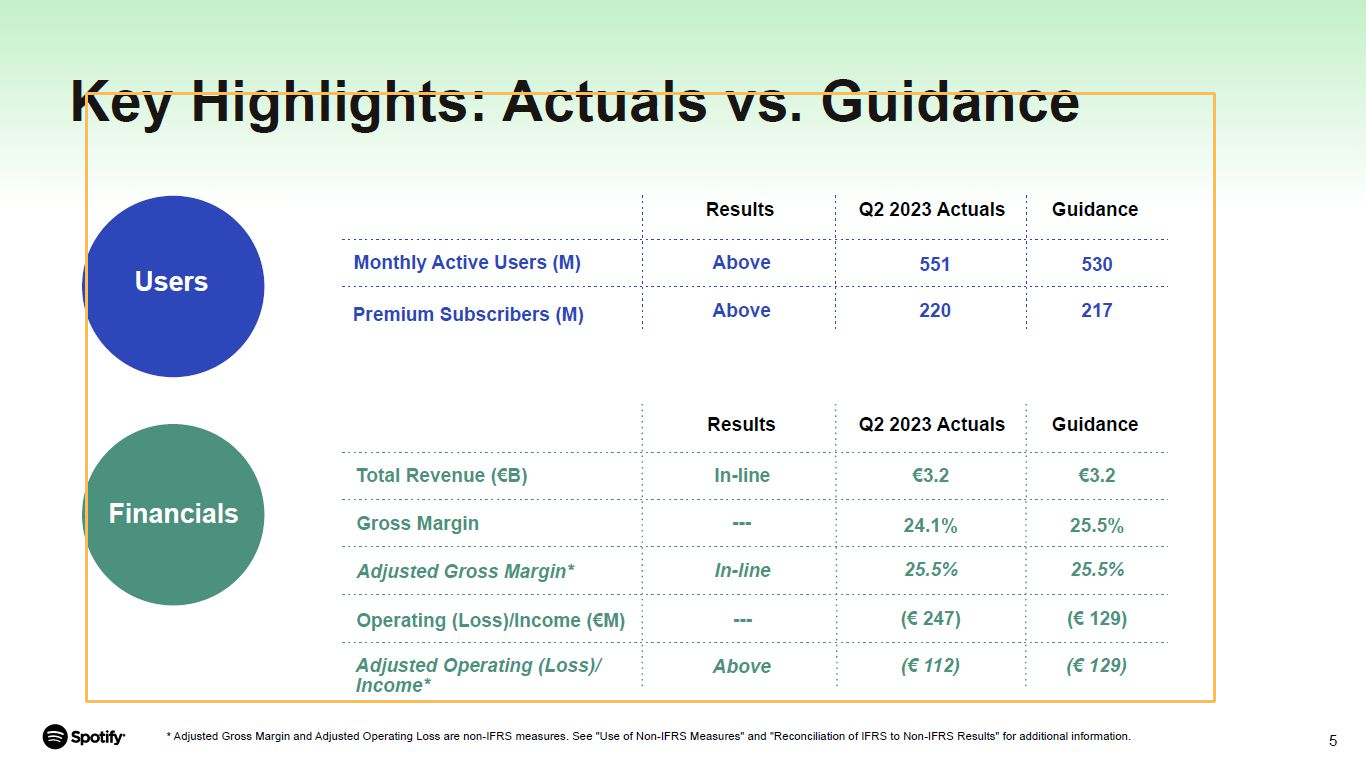

In [107]:
import cv2
import layoutparser as lp
image = cv2.imread("/content/drive/MyDrive/imageocr/image00016.jpg")

image = image[..., ::-1]

# # load model
# model = lp.PaddleDetectionLayoutModel(config_path="lp://PubLayNet/ppyolov2_r50vd_dcn_365e_publaynet/config",
#                                 threshold=0.5,
#                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"},
#                                 enforce_cpu=False,
#                                 enable_mkldnn=True)#math kernel library
# # detect
# layout = model.detect(image)

import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(image)
lp.draw_box(image, layout, box_width=3)


In [108]:
layout

Layout(_blocks=[TextBlock(block=Rectangle(x_1=86.61341094970703, y_1=93.51171112060547, x_2=1214.614013671875, y_2=701.6739501953125), text=None, id=None, type=Figure, parent=None, next=None, score=0.9862300157546997)], page_data={})

In [111]:
x_1=86.61341094970703
y_1=93.51171112060547
x_2=1214.614013671875
y_2=701.6739501953125



for l in layout:
  #print(l)
  if l.type == 'Table':
    x_1 = int(l.block.x_1)
    print(l.block.x_1)
    y_1 = int(l.block.y_1)
    x_2 = int(l.block.x_2)
    y_2 = int(l.block.y_2)

    break

In [112]:
print(x_1,y_1,x_2,y_2)

86.61341094970703 93.51171112060547 1214.614013671875 701.6739501953125


In [114]:
im = cv2.imread('/content/drive/MyDrive/imageocr/image00016.jpg')

In [115]:
cv2.imwrite('ext_im.jpg', im[int(y_1):int(y_2), int(x_1):int(x_2)])


True

In [116]:
from paddleocr import PaddleOCR,draw_ocr

In [117]:
from google.colab.patches import cv2_imshow
import cv2

In [118]:
ocr = PaddleOCR(lang='en')
image_path = '/content/ext_im.jpg'
image_cv = cv2.imread(image_path)
image_height = image_cv.shape[0]
image_width = image_cv.shape[1]
output = ocr.ocr(image_path)[0]

[2024/06/10 10:37:05] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/

In [119]:
print(output)

[[[[618.0, 101.0], [691.0, 104.0], [690.0, 128.0], [617.0, 126.0]], ('Results', 0.9937072992324829)], [[[770.0, 102.0], [923.0, 105.0], [922.0, 128.0], [769.0, 126.0]], ('Q22023 Actuals', 0.9544030427932739)], [[[966.0, 106.0], [1054.0, 106.0], [1054.0, 126.0], [966.0, 126.0]], ('Guidance', 0.9964038729667664)], [[[265.0, 155.0], [496.0, 158.0], [496.0, 182.0], [264.0, 179.0]], ('Monthly Active Users (M)', 0.9452399611473083)], [[[623.0, 157.0], [687.0, 157.0], [687.0, 182.0], [623.0, 182.0]], ('Above', 0.9977987408638)], [[[831.0, 158.0], [868.0, 158.0], [868.0, 182.0], [831.0, 182.0]], ('551', 0.9991495013237)], [[[993.0, 159.0], [1029.0, 159.0], [1029.0, 182.0], [993.0, 182.0]], ('530', 0.9992744326591492)], [[[47.0, 170.0], [126.0, 176.0], [124.0, 206.0], [45.0, 200.0]], ('Users', 0.9984241724014282)], [[[267.0, 211.0], [498.0, 211.0], [498.0, 232.0], [267.0, 232.0]], ('Premium Subscribers (M)', 0.9627647995948792)], [[[624.0, 205.0], [687.0, 205.0], [687.0, 230.0], [624.0, 230.0]]

In [120]:
boxes = [line[0] for line in output]
texts = [line[1][0] for line in output]
probabilities = [line[1][1] for line in output]

In [121]:
image_boxes = image_cv.copy()

In [122]:
for box,text in zip(boxes,texts):
  cv2.rectangle(image_boxes, (int(box[0][0]),int(box[0][1])), (int(box[2][0]),int(box[2][1])),(0,0,255),1)
  cv2.putText(image_boxes, text,(int(box[0][0]),int(box[0][1])),cv2.FONT_HERSHEY_SIMPLEX,1,(222,0,0),1)

In [123]:
cv2.imwrite('detections.jpg', image_boxes)

True

In [124]:
im = image_cv.copy()

In [125]:
horiz_boxes = []
vert_boxes = []

for box in boxes:
  x_h, x_v = 0,int(box[0][0])
  y_h, y_v = int(box[0][1]),0
  width_h,width_v = image_width, int(box[2][0]-box[0][0])
  height_h,height_v = int(box[2][1]-box[0][1]),image_height

  horiz_boxes.append([x_h,y_h,x_h+width_h,y_h+height_h])
  vert_boxes.append([x_v,y_v,x_v+width_v,y_v+height_v])

  cv2.rectangle(im,(x_h,y_h), (x_h+width_h,y_h+height_h),(0,0,255),1)
  cv2.rectangle(im,(x_v,y_v), (x_v+width_v,y_v+height_v),(0,255,0),1)


In [127]:
cv2.imwrite('horiz_vert.jpg',im)

True

In [128]:
horiz_out = tf.image.non_max_suppression(
    horiz_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.1,
    score_threshold=float('-inf'),
    name=None
)

In [129]:
horiz_lines = np.sort(np.array(horiz_out))
print(horiz_lines)

[ 2  6 11 14 18 19 26 27 32 34]


In [130]:
im_nms = image_cv.copy()

In [131]:
for val in horiz_lines:
  cv2.rectangle(im_nms, (int(horiz_boxes[val][0]),int(horiz_boxes[val][1])), (int(horiz_boxes[val][2]),int(horiz_boxes[val][3])),(0,0,255),1)

In [132]:
cv2.imwrite('im_nms.jpg',im_nms)

True

In [134]:
vert_out = tf.image.non_max_suppression(
    vert_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.1,
    score_threshold=float('-inf'),
    name=None
)

In [135]:
print(vert_out)

tf.Tensor([ 6  5  7  4 34], shape=(5,), dtype=int32)


In [136]:
vert_lines = np.sort(np.array(vert_out))
print(vert_lines)

[ 4  5  6  7 34]


In [137]:
for val in vert_lines:
  cv2.rectangle(im_nms, (int(vert_boxes[val][0]),int(vert_boxes[val][1])), (int(vert_boxes[val][2]),int(vert_boxes[val][3])),(255,0,0),1)

In [138]:
cv2.imwrite('im_nms.jpg',im_nms)

True

In [139]:

out_array = [["" for i in range(len(vert_lines))] for j in range(len(horiz_lines))]
print(np.array(out_array).shape)
print(out_array)

(10, 5)
[['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', ''], ['', '', '', '', '']]


In [140]:

unordered_boxes = []

for i in vert_lines:
  print(vert_boxes[i])
  unordered_boxes.append(vert_boxes[i][0])

[623, 0, 687, 608]
[831, 0, 868, 608]
[993, 0, 1029, 608]
[47, 0, 124, 608]
[270, 0, 347, 608]


In [141]:
ordered_boxes = np.argsort(unordered_boxes)
print(ordered_boxes)

[3 4 0 1 2]


In [142]:
def intersection(box_1, box_2):
  return [box_2[0], box_1[1],box_2[2], box_1[3]]

In [143]:
def iou(box_1, box_2):

  x_1 = max(box_1[0], box_2[0])
  y_1 = max(box_1[1], box_2[1])
  x_2 = min(box_1[2], box_2[2])
  y_2 = min(box_1[3], box_2[3])

  inter = abs(max((x_2 - x_1, 0)) * max((y_2 - y_1), 0))
  if inter == 0:
      return 0

  box_1_area = abs((box_1[2] - box_1[0]) * (box_1[3] - box_1[1]))
  box_2_area = abs((box_2[2] - box_2[0]) * (box_2[3] - box_2[1]))

  return inter / float(box_1_area + box_2_area - inter)

In [144]:
for i in range(len(horiz_lines)):
  for j in range(len(vert_lines)):
    resultant = intersection(horiz_boxes[horiz_lines[i]], vert_boxes[vert_lines[ordered_boxes[j]]] )

    for b in range(len(boxes)):
      the_box = [boxes[b][0][0],boxes[b][0][1],boxes[b][2][0],boxes[b][2][1]]
      if(iou(resultant,the_box)>0.1):
        out_array[i][j] = texts[b]

In [145]:
out_array=np.array(out_array)

In [146]:
out_array

array([['', '', 'Results', 'Q22023 Actuals', 'Guidance'],
       ['Users', 'Monthly Active Users (M)', 'Above', '551', '530'],
       ['', 'Premium Subscribers (M)', 'Above', '220', '217'],
       ['', '', 'Results', 'Q22023 Actuals', 'Guidance'],
       ['', 'Total Revenue (B)', 'In-line', '3.2', '3.2'],
       ['Financials', 'Gross Margin', '', '24.1%', '25.5%'],
       ['', 'Adjusted Gross Margin*', 'In-line', '25.5%', '25.5%'],
       ['', 'Operating Loss)/Income (EM', '', '(247)', '129)'],
       ['', 'Adjusted Operating (Loss)/', 'Above', '112', '(129)'],
       ['', 'Income*', '', '', '']], dtype='<U26')

In [147]:
pd.DataFrame(out_array).to_csv('sample.csv')